In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/Project0"
os.chdir(path)

## **Import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_pickle('jizoh.strain.2020-09-18.pkl')
df.head(10)

,IN_S1_C,IN_S2_C,W_G2_C,W_G3_C,OUT_S1_A1,OUT_S2_A1,OUT_S3_A1,R_G1_A1,R_G2_A1,R_G3_A1,R_G4_A1
2020-09-18 00:00:00.000,-5.20,-0.75,0.80,-0.50,-4.15,-3.75,0.550000,-0.05,-0.70,-1.299999,0.35
2020-09-18 00:00:00.005,-5.80,-0.90,0.35,-1.05,-4.60,-4.55,0.300000,-0.20,-1.25,-2.200000,-0.30
2020-09-18 00:00:00.010,-5.45,-0.30,0.90,-0.35,-4.40,-4.55,0.400000,0.10,-0.85,-1.500000,-0.55
2020-09-18 00:00:00.015,-5.20,-0.30,1.05,-0.25,-3.80,-4.25,0.700000,0.60,-0.30,-0.849999,-0.35
2020-09-18 00:00:00.020,-5.40,-1.00,0.75,-0.90,-4.30,-4.80,0.300000,0.55,-0.25,-0.750000,-0.55
2020-09-18 00:00:00.025,-5.20,-0.95,1.75,-0.45,-4.60,-4.75,0.300000,0.45,-0.10,-0.299999,-0.50
2020-09-18 00:00:00.030,-5.15,-0.55,2.40,0.10,-3.90,-3.90,0.650000,0.65,0.45,0.250000,0.45
2020-09-18 00:00:00.035,-5.85,-0.65,1.65,-0.20,-4.00,-3.95,0.349999,0.10,0.20,-0.200000,0.75
2020-09-18 00:00:00.040,-6.10,-0.75,1.80,-0.45,-4.45,-4.55,-0.100000,-0.70,-0.40,-0.799999,0.55
2020-09-18 00:00:00.045,-5.40,-0.40,2.50,-0.20,-4.00,-4.25,0.250000,-0.45,-0.10,-0.349999,1.45


## **Function**


In [4]:
channel = ["IN_S1_C", "IN_S2_C", "W_G2_C", "W_G3_C", "OUT_S1_A1", "OUT_S2_A1", "OUT_S3_A1", "R_G1_A1", "R_G2_A1", "R_G3_A1", "R_G4_A1"]
time_step = 1/200
sample_rate = 200   # number of samples taken per second

In [5]:
def time_domain(channel, start_time, end_time):
    t = np.arange(start_time, end_time, time_step)  
    signal = df[channel][(start_time*sample_rate):(end_time*sample_rate)]

    fig = plt.figure(figsize=(9, 3), dpi=150) 
    plt.title(channel)
    plt.plot(t, signal, color = 'tab:red', LineWidth=1.5, label='Noisy Signal')
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.xlim(start_time, end_time)
    plt.legend()
    plt.show()

In [6]:
def frequency_domain(channel, start_time, end_time):
    t = np.arange(start_time, end_time, time_step)  
    signal = df[channel][(start_time*sample_rate):(end_time*sample_rate)]

    n = len(t)
    fhat = np.fft.fft(signal,n)
    PSD = fhat * np.conj(fhat) / n
    freq = 1/(time_step*n) * np.arange(n)
    L = np.arange(1, np.floor(n/2), dtype='int')

    fig = plt.figure(figsize=(9, 3), dpi=150) 
    plt.title(channel)
    plt.plot(freq[L], PSD[L], color='tab:red', LineWidth=1.5, label='Noisy Signal')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Power')
    plt.xlim(freq[L[0]], freq[L[-1]])
    plt.legend()
    plt.show()

In [7]:
def wavelet_denoising(channel, start_time, end_time):
    t = np.arange(start_time, end_time, time_step)  
    noisy_signal = df[channel][int(start_time/time_step):int(end_time/time_step)]

    denoised_signal = denoise_wavelet(noisy_signal, method='VisuShrink', mode='soft', 
                                      wavelet_levels=4, wavelet='sym6', rescale_sigma='True')

    fig = plt.figure(figsize=(9, 3), dpi=150) 
    plt.title(channel)
    plt.plot(t, noisy_signal, color='tab:red', LineWidth=1.5, label='Noisy Signal')
    plt.plot(t, denoised_signal, color='tab:cyan', LineWidth=1.5, label='Denoised Signal')
    plt.xlabel('Time(s)')
    plt.ylabel('Amplitude')
    plt.xlim(start_time, end_time)
    plt.legend()
    plt.show()

    n = len(t)
    fhat1 = np.fft.fft(noisy_signal,n)
    PSD = fhat1 * np.conj(fhat1) / n
    freq = 1/(time_step*n) * np.arange(n)
    L = np.arange(1, np.floor(n/2), dtype='int')
    fhat2 = np.fft.fft(denoised_signal,n)
    PSD_clean = fhat2 * np.conj(fhat2) / n
    
    fig = plt.figure(figsize=(9, 3), dpi=150) 
    plt.title(channel)
    plt.plot(freq[L], PSD[L], color='tab:red', LineWidth=1.5, label='Original Signal')
    plt.plot(freq[L], PSD_clean[L], color='tab:cyan', LineWidth=1.5, label='Denoised_signal')
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Power')
    plt.xlim(freq[L[0]], freq[L[-1]])
    plt.legend()
    plt.show()

## **Main**

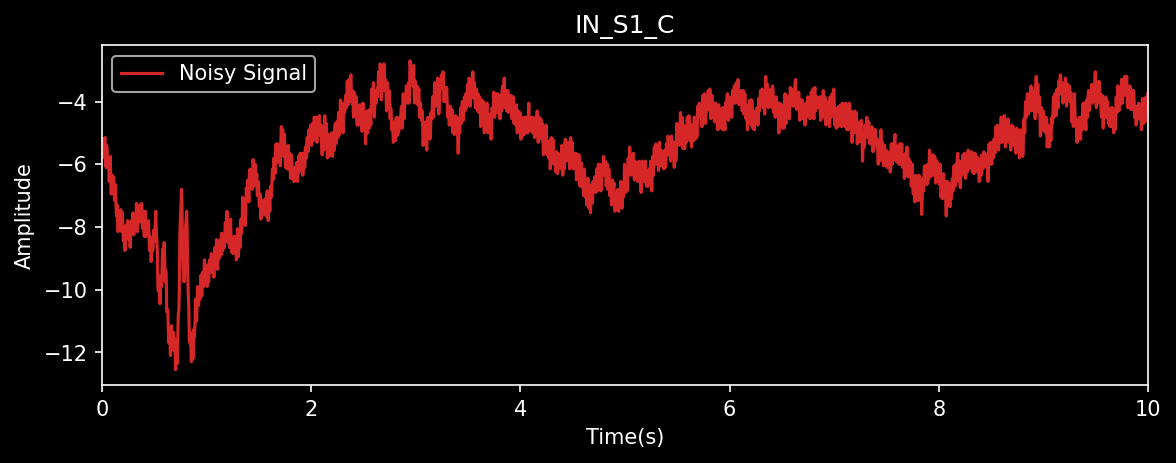

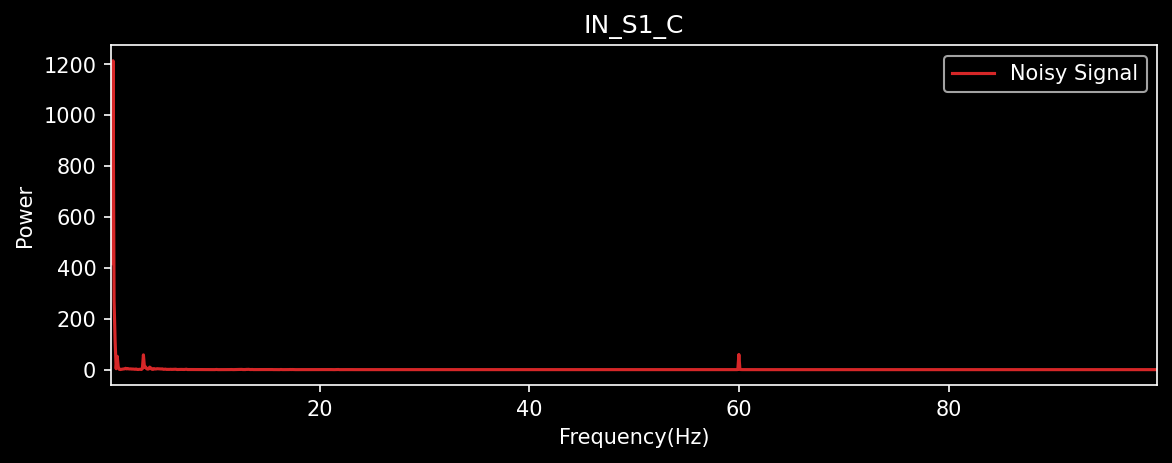

In [8]:
with plt.style.context('dark_background'): 
    time_domain(channel[0],0,10)
    frequency_domain(channel[0],0,10)

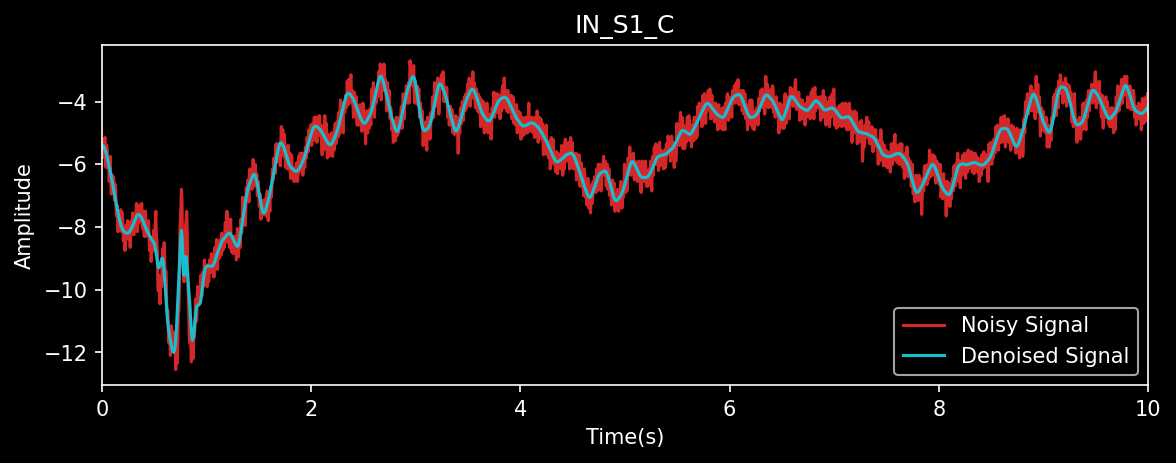

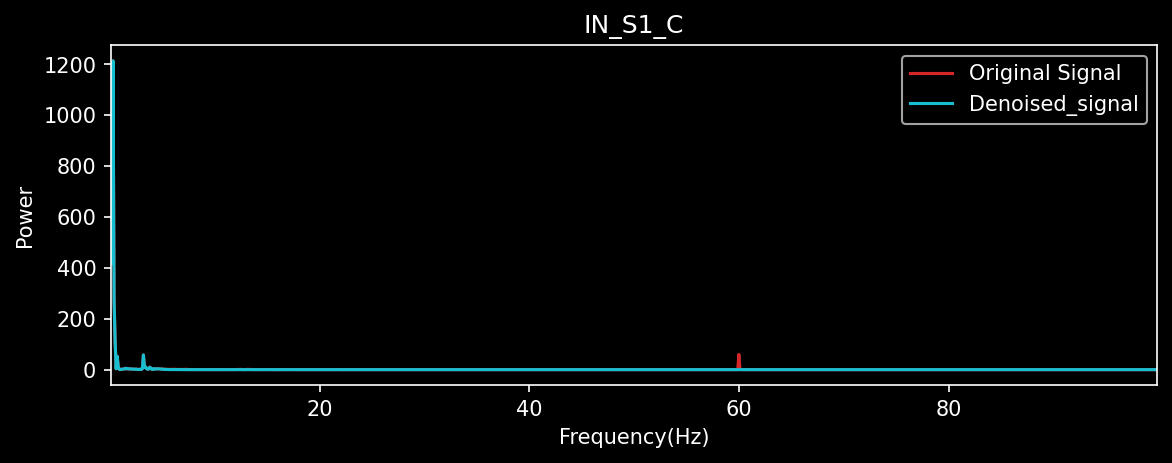

In [9]:
with plt.style.context('dark_background'): wavelet_denoising(channel[0],0,10)